In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set(color_codes=True)
%matplotlib inline

In [2]:
df= pd.read_csv("retail_sales.csv")

In [3]:
df.shape

(3000, 11)

In [4]:
df.head()

,OrderID,OrderDate,CustomerID,Region,Category,SubCategory,Product,Quantity,UnitPrice,Sales,Profit
0,1001,2023-04-13,CUST436,North,Furniture,Tables,Table B,8,705,5640,955.25
1,1002,2023-05-02,CUST467,North,Furniture,Chairs,Chair C,7,335,2345,332.64
2,1003,2023-04-10,CUST360,West,Furniture,Chairs,Chair C,8,135,1080,58.45
3,1004,2023-09-15,CUST344,North,Technology,Accessories,Accessory B,6,390,2340,202.09
4,1005,2023-10-04,CUST161,East,OfficeSupplies,Paper,Paper A,6,257,1542,210.31


In [6]:
df['OrderDate']  = pd.to_datetime(df['OrderDate'],dayfirst=True)
df['OrderDate'].dt.year

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
2995    2023
2996    2023
2997    2023
2998    2023
2999    2023
Name: OrderDate, Length: 3000, dtype: int32

In [7]:
df['Month']=df['OrderDate'].dt.month
df['Year']= df['OrderDate'].dt.year

In [8]:
df.head()

,OrderID,OrderDate,CustomerID,Region,Category,SubCategory,Product,Quantity,UnitPrice,Sales,Profit,Month,Year
0,1001,2023-04-13,CUST436,North,Furniture,Tables,Table B,8,705,5640,955.25,4,2023
1,1002,2023-05-02,CUST467,North,Furniture,Chairs,Chair C,7,335,2345,332.64,5,2023
2,1003,2023-04-10,CUST360,West,Furniture,Chairs,Chair C,8,135,1080,58.45,4,2023
3,1004,2023-09-15,CUST344,North,Technology,Accessories,Accessory B,6,390,2340,202.09,9,2023
4,1005,2023-10-04,CUST161,East,OfficeSupplies,Paper,Paper A,6,257,1542,210.31,10,2023


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      3000 non-null   int64         
 1   OrderDate    3000 non-null   datetime64[ns]
 2   CustomerID   3000 non-null   object        
 3   Region       3000 non-null   object        
 4   Category     3000 non-null   object        
 5   SubCategory  3000 non-null   object        
 6   Product      3000 non-null   object        
 7   Quantity     3000 non-null   int64         
 8   UnitPrice    3000 non-null   int64         
 9   Sales        3000 non-null   int64         
 10  Profit       3000 non-null   float64       
 11  Month        3000 non-null   int32         
 12  Year         3000 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object(5)
memory usage: 281.4+ KB


In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
OrderID,3000.0,2500.5,1001.0,1750.75,2500.5,3250.25,4000.0,866.169729
OrderDate,3000,2023-06-28 12:54:43.200000,2023-01-01 00:00:00,2023-03-30 00:00:00,2023-06-27 00:00:00,2023-09-26 00:00:00,2023-12-31 00:00:00,NaN
Quantity,3000.0,4.953,1.0,3.0,5.0,7.0,9.0,2.610695
UnitPrice,3000.0,508.242,5.0,261.75,514.5,755.25,999.0,283.832273
Sales,3000.0,2498.235333,7.0,816.0,1960.0,3736.0,8973.0,2039.070073
Profit,3000.0,372.213867,1.0,109.015,256.25,525.7225,2213.76,354.070489
Month,3000.0,6.413667,1.0,3.0,6.0,9.0,12.0,3.43052
Year,3000.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,0.0


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

OrderID        0
OrderDate      0
CustomerID     0
Region         0
Category       0
SubCategory    0
Product        0
Quantity       0
UnitPrice      0
Sales          0
Profit         0
Month          0
Year           0
dtype: int64

**UNIVARIATE ANALYSIS**


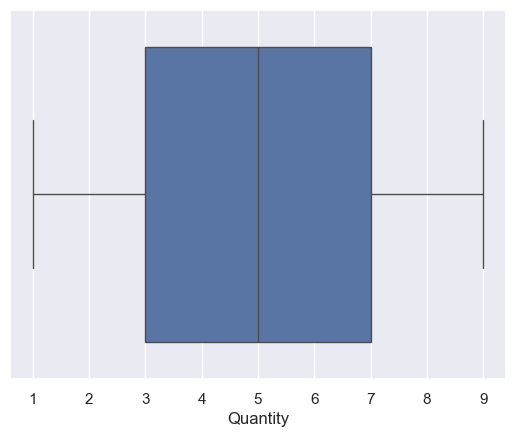

In [13]:
sns.boxplot(x='Quantity',data= df)
plt.show()

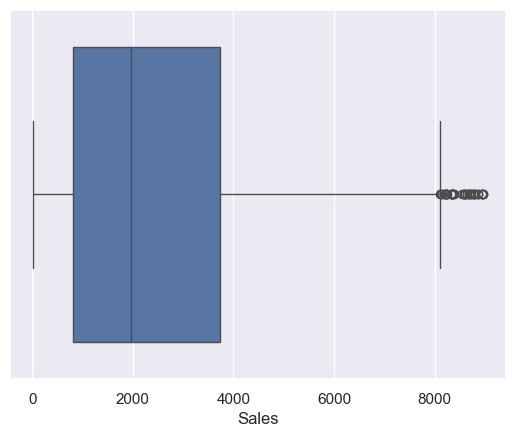

In [22]:
sns.boxplot(x='Sales',data= df)
plt.show()

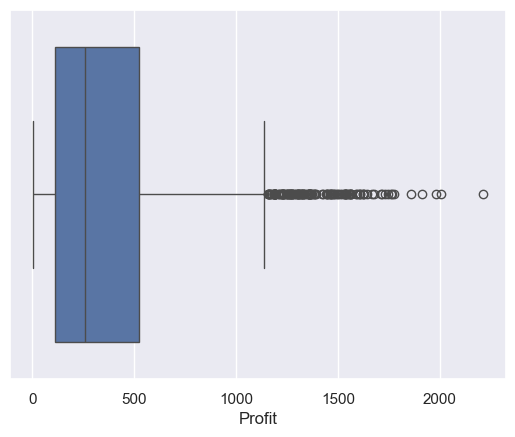

In [23]:
sns.boxplot(x='Profit',data= df)
plt.show()

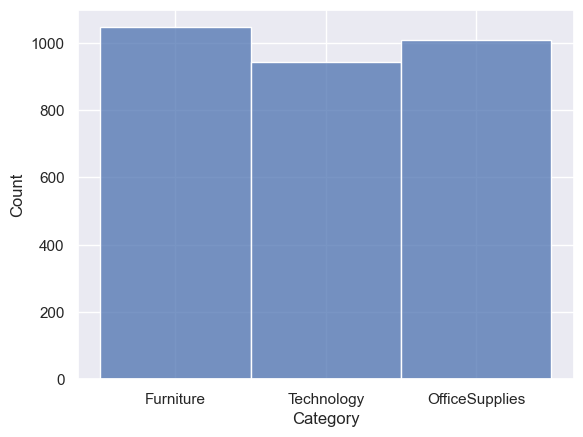

In [27]:
sns.histplot(x='Category',data=df)
plt.show()  

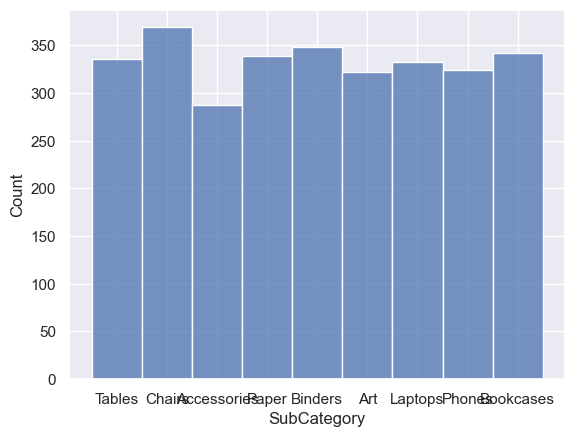

In [29]:
sns.histplot(x='SubCategory',data=df)
plt.show()

**BIVARIATE ANALYSIS**

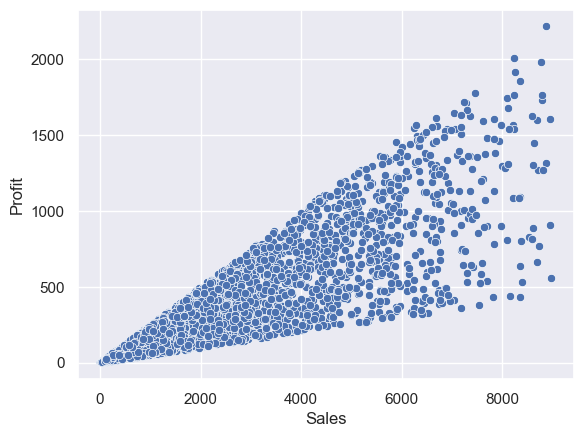

In [17]:
sns.scatterplot(x='Sales',y='Profit',data=df)
plt.show()

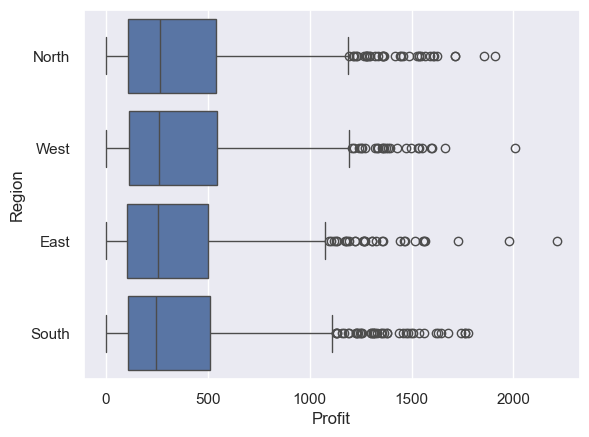

In [18]:
sns.boxplot(x='Profit',y='Region',data=df)
plt.show()

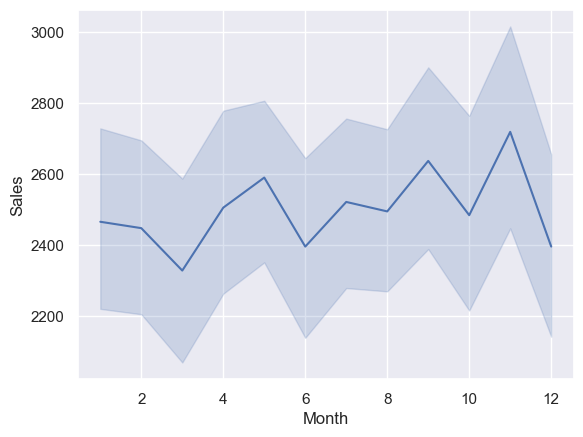

In [25]:


sns.lineplot(x='Month', y='Sales', data=df)
plt.show()

**MULTIVARIATE ANALYSIS**

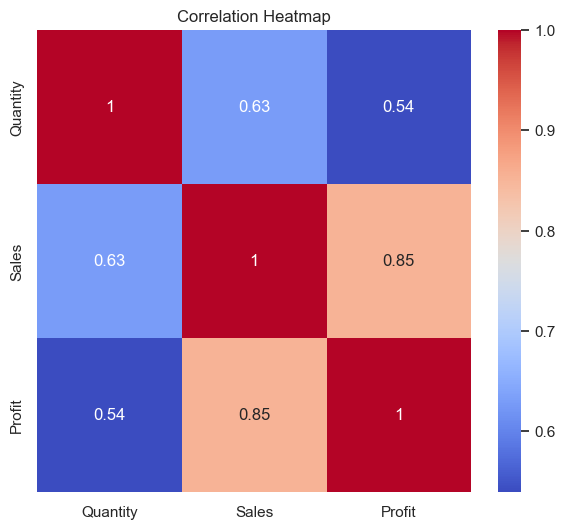

In [30]:
numeric_df = df[['Quantity', 'Sales', 'Profit']]
plt.figure(figsize=(7,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

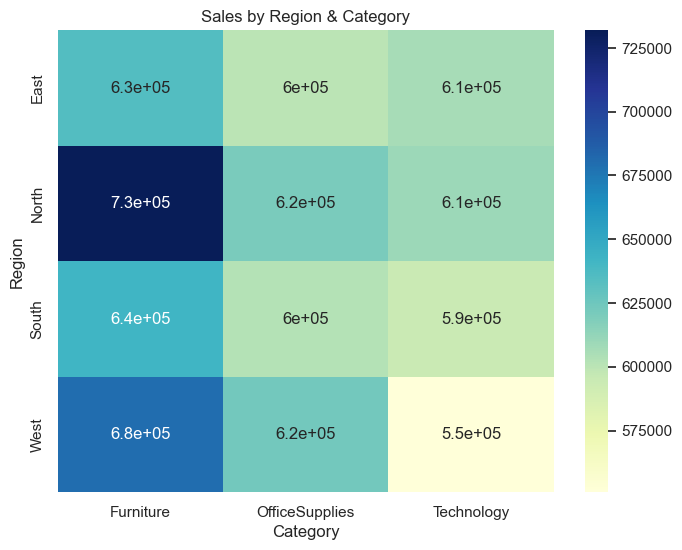

In [31]:
pivot = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Sales by Region & Category')
plt.show()

**BUSINESS QUESTIONS**

1. The highest profit is by selling furniture.
2. Out of all regions, North side shops sell the most and get the top sales.
3. Just because sales look big, profit may not always be high. Many times, discounts and offers make profit less even when sales look good. So, earning and selling are not always equal.
4. Sales are really high in months like may and November.
5. A few customers come to the shop again and again. They purchase more compared to others and help the shop get more money. Giving these regular buyers some loyalty rewards or special care will help business even better.
